## Import the packages

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.preprocessing.image import load_img
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

## Load the data

In [ ]:
curr_dir = os.getcwd()
curr_dir

In [5]:
# get the location of the data folder

data_dir = os.path.join(curr_dir,'Data')

In [6]:
test_csv = pd.read_csv(data_dir+'/'+'Test.csv')

In [7]:
train_dir = os.path.join(data_dir,'Train')

In [8]:
test_dir = os.path.join(data_dir,'Test')

In [9]:
# Image collection and Preprocessing
#collect all the training images

classIds = 43
datalist = []
labels = []
for i in range(43):
    folder = os.path.join(train_dir,str(i))
    for image in os.listdir(folder):
        image = load_img(folder+"/"+image)
        image = image.resize((50,50)) # resizing all the images to same size
        img = np.array(image)  #convert all images to arrays
        datalist.append(img)
        labels.append(i)
data = np.array(datalist)
labels = np.array(labels)
        

## Training,Cross-validation and model tuning

In [10]:
# split the data into train and validation sets

x_train,x_val,y_train,y_val = train_test_split(data,labels,test_size=0.2)

In [11]:
x_train.shape

(31367, 50, 50, 3)

In [12]:
y_train.shape

(31367,)

In [13]:
x_val.shape

(7842, 50, 50, 3)

In [14]:
y_val.shape

(7842,)

Since we are dealing with classification problem we have to perform one hot encoding on our labels. It is optional though instead of that we can just leave it and use appropriate loss function during compilation.

In [15]:
# Perform one-hot encoding on the labels

y_train = tf.one_hot(y_train,43)
y_val = tf.one_hot(y_val,43)

### Build the model

In [16]:
# Architecture of the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (50,50,3),padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten()) # flatten the output of previous layer to 1D array in order to feed into fully connected layer

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(43,activation='softmax'))

In [17]:
# Specify batch size and no of epochs

batch_size = 64
epochs = 20

### Compile the model

In [18]:
# Compile the model

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [19]:
# summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

We have a total of around 6,00,000 trainable paramaters in our model which gets updated during the training process according to the training loss.

In [20]:
# Train the model

history = model.fit(x_train,y_train,
                   epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))

Epoch 1/20
491/491 [==============================] - 7s 11ms/step - loss: 2.5591 - accuracy: 0.2823 - val_loss: 1.3271 - val_accuracy: 0.5333
Epoch 2/20
491/491 [==============================] - 5s 11ms/step - loss: 1.0360 - accuracy: 0.6604 - val_loss: 0.4178 - val_accuracy: 0.8623
Epoch 3/20
491/491 [==============================] - 5s 11ms/step - loss: 0.5546 - accuracy: 0.8197 - val_loss: 0.2143 - val_accuracy: 0.9323
Epoch 4/20
491/491 [==============================] - 5s 11ms/step - loss: 0.3806 - accuracy: 0.8798 - val_loss: 0.1654 - val_accuracy: 0.9467
Epoch 5/20
491/491 [==============================] - 5s 11ms/step - loss: 0.2862 - accuracy: 0.9113 - val_loss: 0.1035 - val_accuracy: 0.9707
Epoch 6/20
491/491 [==============================] - 5s 11ms/step - loss: 0.2457 - accuracy: 0.9254 - val_loss: 0.0681 - val_accuracy: 0.9818
Epoch 7/20
491/491 [==============================] - 6s 12ms/step - loss: 0.2080 - accuracy: 0.9377 - val_loss: 0.0572 - val_accuracy: 0.9834

In [21]:
# get the fit method results

loss= history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

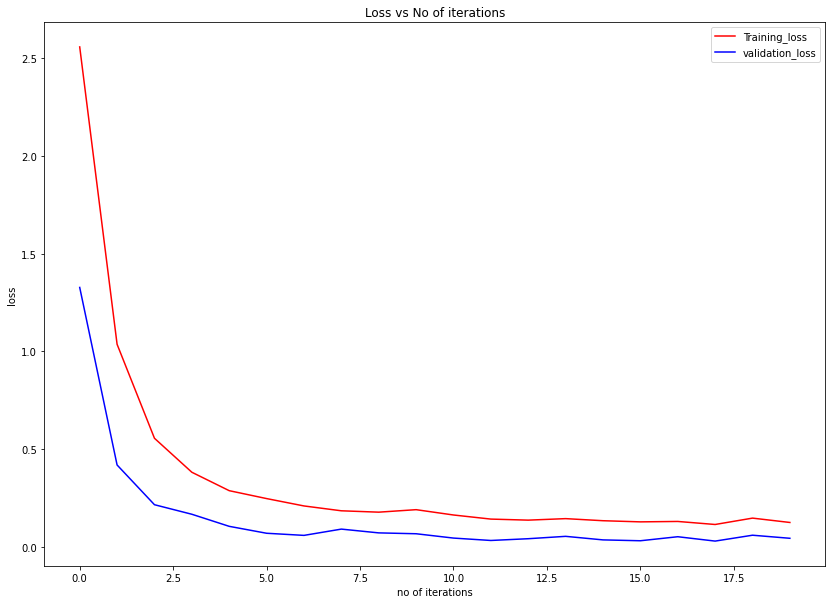

In [22]:
# plot the loss vs epochs 

plt.figure(figsize=(14,10))
iterations = range(epochs)
plt.plot(iterations,loss,label='Training_loss',color='red')
plt.plot(iterations,val_loss,label='validation_loss',color='blue')
plt.xlabel('no of iterations')
plt.ylabel('loss')
plt.title('Loss vs No of iterations')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14,10))
iterations = range(epochs)
plt.plot(iterations,train_acc,label='Training_accuracy',color='red')
plt.plot(iterations,val_acc,label='validation_accuracy',color='blue')
plt.xlabel('no of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of iterations')
plt.legend()
plt.show()

- Observations:
    - Train accuracy and validation accuracy remains almost same after 10 epochs. so it's probably better to keep epochs to 10.
    - Model seems to perform very well on both training and validation sets  
    - Model seems to perform well on validation set more than on training set. 

## Predictions

Before we make predictions we have to collect our test images from test folder in our base directory. Then we will test our model on this set to see how well it generalizes.

In [23]:
test_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [24]:
test_labels = test_csv['ClassId'].values

In [25]:
# Get the test images, resize them and convert them into numpy arrays.

image_paths = test_csv['Path'].values
test_images = []

for img_path in image_paths:
    image = load_img(data_dir+'/'+img_path)
    image = image.resize((50,50))
    img = np.array(image)
    test_images.append(img)

test_images = np.array(test_images)

In [26]:
# make predictions

predictions = model.predict(test_images)

395/395 [==============================] - 1s 3ms/step


In [27]:
len(predictions)

12630

In [28]:
# Get the id of each test image and store it in a list

pred_labels = []

for i,arr in enumerate(predictions):
    y_pred = np.argmax(arr)
    pred_labels.append(y_pred)


In [29]:
pred_labels = np.array(pred_labels)

In [30]:
# Calculate the accuracy of model on test images.

print('Accuracy: ',accuracy_score(test_labels,pred_labels))

Accuracy:  0.9642913697545527


After so many trial and error, I have managed to increase the accuracy of my model from 91 % to 96.4 % using popular overfitting remedy called dropout.

### Save the model for deployment.

In [ ]:
# save the model for future purposes

model.save('my_model')